<a href="https://colab.research.google.com/github/Jab-bee/Calificaciones/blob/main/Trabajo_Final_IA_Grupo_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np # algebra linear
import pandas as pd # data
!pip install scikit-learn
!pip install imbalanced-learn --upgrade

https://www.kaggle.com/datasets/preethamgouda/financial-risk/data

Ejemplo a seguir https://www.kaggle.com/code/preethamgouda/sample

https://www.kaggle.com/code/zeyadsayedadbullah/individual-financial-risk-analysis

In [81]:
#Manipulación de datos
import numpy as np
import pandas as pd

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocesamiento
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline  # sklearn
from imblearn.pipeline import Pipeline
from sklearn.neighbors import NearestCentroid, KNeighborsTransformer, RadiusNeighborsClassifier


#Modelado
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

#Selección y validación
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
    cross_val_score,
    train_test_split
)

#Métricas y evaluación
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_recall_fscore_support,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize

#Técnicas de muestreo
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, SMOTE
from imblearn.under_sampling import NearMiss, RandomUnderSampler

#Configuración
import warnings
warnings.filterwarnings("ignore")

# Visualizacion de los datos
sns.set(style="whitegrid")

In [82]:
# Instalacion de librerias
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Mirar el set
file_path = "financial_risk_assessment.csv"  #Cambio de nombre

# Cargar version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "preethamgouda/financial-risk",
  file_path)

#Otra manera de cargarlo en caso de que no funcione se lee base de datos
#df = pd.read_csv('financial_risk_assessment.csv')


## Descripcion y Analisis Descriptivo

In [83]:
# Diccionario de traducción de columnas al español
nombres_es = {
    'Age': 'Edad',
    'Gender': 'Género',
    'Education Level': 'Nivel Educativo',
    'Marital Status': 'Estado Civil',
    'Income': 'Ingreso',
    'Credit Score': 'Puntaje de Crédito',
    'Loan Amount': 'Monto del Préstamo',
    'Loan Purpose': 'Propósito del Préstamo',
    'Employment Status': 'Situación Laboral',
    'Years at Current Job': 'Años en el Empleo Actual',
    'Payment History': 'Historial de Pagos',
    'Debt-to-Income Ratio': 'Relación Deuda-Ingreso',
    'Assets Value': 'Valor de Activos',
    'Number of Dependents': 'Número de Dependientes',
    'City': 'Ciudad',
    'State': 'Estado',
    'Country': 'País',
    'Previous Defaults': 'Incumplimientos Previos',
    'Marital Status Change': 'Cambio de Estado Civil',
    'Risk Rating': 'Calificación de Riesgo'
}

# Renombrar columnas
df.rename(columns=nombres_es, inplace=True)

# Verificar los nuevos nombres
df.columns


Index(['Edad', 'Género', 'Nivel Educativo', 'Estado Civil', 'Ingreso',
       'Puntaje de Crédito', 'Monto del Préstamo', 'Propósito del Préstamo',
       'Situación Laboral', 'Años en el Empleo Actual', 'Historial de Pagos',
       'Relación Deuda-Ingreso', 'Valor de Activos', 'Número de Dependientes',
       'Ciudad', 'Estado', 'País', 'Incumplimientos Previos',
       'Cambio de Estado Civil', 'Calificación de Riesgo'],
      dtype='object')

In [84]:
# Se muestran los 10 primeros
df.head()

,Edad,Género,Nivel Educativo,Estado Civil,Ingreso,Puntaje de Crédito,Monto del Préstamo,Propósito del Préstamo,Situación Laboral,Años en el Empleo Actual,Historial de Pagos,Relación Deuda-Ingreso,Valor de Activos,Número de Dependientes,Ciudad,Estado,País,Incumplimientos Previos,Cambio de Estado Civil,Calificación de Riesgo
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [85]:
# Informacion basica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Edad                      15000 non-null  int64  
 1   Género                    15000 non-null  object 
 2   Nivel Educativo           15000 non-null  object 
 3   Estado Civil              15000 non-null  object 
 4   Ingreso                   12750 non-null  float64
 5   Puntaje de Crédito        12750 non-null  float64
 6   Monto del Préstamo        12750 non-null  float64
 7   Propósito del Préstamo    15000 non-null  object 
 8   Situación Laboral         15000 non-null  object 
 9   Años en el Empleo Actual  15000 non-null  int64  
 10  Historial de Pagos        15000 non-null  object 
 11  Relación Deuda-Ingreso    15000 non-null  float64
 12  Valor de Activos          12750 non-null  float64
 13  Número de Dependientes    12750 non-null  float64
 14  Ciudad

#### Descripcion numericas


In [86]:
# Descripcion estadistica
df.describe(include=[np.number])

,Edad,Ingreso,Puntaje de Crédito,Monto del Préstamo,Años en el Empleo Actual,Relación Deuda-Ingreso,Valor de Activos,Número de Dependientes,Incumplimientos Previos,Cambio de Estado Civil
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.00000,4.000000,2.000000


**Datos Completos vs. Datos Faltantes:**
   El análisis muestra que la mayoría de las variables están completas, lo que es un buen indicio de consistencia en los datos. Sin embargo, algunas variables clave, como el ingreso, el puntaje de crédito y los activos, presentan datos faltantes en alrededor del 15% de los registros, lo que sugiere la necesidad de técnicas de imputación para mejorar la calidad del análisis.

**Distribución de Variables Numéricas:**
   Las variables muestran distribuciones equilibradas, destacando una edad promedio de 43 años y un ingreso medio de cerca de \$70,000, con una mediana similar. Los montos de préstamos solicitados varían, pero generalmente se sitúan en torno a los \$27,450, lo que refleja una solicitud de crédito moderada. A su vez, la relación deuda-ingreso y los años en el empleo actual sugieren un perfil financiero estable, con un enfoque en un control razonable del riesgo.

**Observaciones Clave:**
   El perfil típico del cliente es una persona de 43 años, con un ingreso cercano a los \$70,000 y un puntaje de crédito en niveles saludables (aproximadamente 700). Además, se observa una tendencia a tener alrededor de 2 dependientes y hasta 2 incumplimientos previos. La variabilidad en las características laborales y el comportamiento crediticio resalta la diversidad de la base de datos.

**Recomendaciones:**
   Es crucial abordar los valores faltantes a través de imputaciones o eliminación de registros, dependiendo de su impacto. También se recomienda investigar las correlaciones entre las variables, como el ingreso y el monto del préstamo, y realizar segmentaciones más profundas para explorar patrones, como la relación entre el estado civil y el historial crediticio. Estas acciones fortalecerán el análisis y ayudarán a optimizar la toma de decisiones.


#### Descripcion Categoricas

In [87]:
# Resumen estadistico de categorias
df.describe(include=[object])

,Género,Nivel Educativo,Estado Civil,Propósito del Préstamo,Situación Laboral,Historial de Pagos,Ciudad,Estado,País,Calificación de Riesgo
count,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
unique,3,4,4,4,3,4,10614,59,243,3
top,Non-binary,Bachelor's,Widowed,Personal,Employed,Good,East Michael,CO,Congo,Low
freq,5059,3829,3893,3771,5026,3822,19,282,124,9000


1. **Datos Completos:**
   Todas las variables categóricas están completas, lo que facilita un análisis fiable y sin la necesidad de imputar valores nulos. Esto garantiza la integridad de los datos y contribuye a una mejor interpretación de las categorías.

2. **Distribución y Frecuencias:**
   La diversidad de género es notable, con una representación significativa de personas no binarias, que constituye aproximadamente el 33.7% de la muestra. En cuanto al nivel educativo, el 25.5% posee un título universitario. El estado civil presenta un hallazgo peculiar, ya que los viudos son el grupo más grande, lo que podría requerir una validación de los datos. El propósito del préstamo más común es personal, y un 33.5% de los individuos están empleados formalmente, lo que resalta la estabilidad laboral predominante en el grupo.

3. **Hallazgos Clave:**
   El análisis revela una población diversa en género y educación, pero con algunas irregularidades, como el estado civil "viudo", que podría indicar un error de codificación. Además, la mayoría de los individuos tiene un bajo riesgo crediticio, pero aún existe un porcentaje considerable en categorías de riesgo medio y alto. La distribución geográfica es amplia, con algunos datos que podrían necesitar agrupación para mejorar el análisis, como la presencia atípica de "Congo" como país principal.

4. **Recomendaciones:**
   Es fundamental validar las categorías inusuales, como "Widowed" y "Congo". Además, se sugiere agrupar las ciudades o países con pocos registros para mejorar la representatividad geográfica. Realizar un análisis segmentado de riesgo, comparando el perfil de riesgo bajo frente al medio/alto, también permitirá obtener insights más detallados. La limpieza de datos es clave para asegurar que las categorías de género y estado civil sean correctas y no contengan errores de codificación.


#### Valores nulos


In [88]:
# Miras cuantos valores nulos tiene
df.isnull().sum()

,0
Edad,0
Género,0
Nivel Educativo,0
Estado Civil,0
Ingreso,2250
Puntaje de Crédito,2250
Monto del Préstamo,2250
Propósito del Préstamo,0
Situación Laboral,0
Años en el Empleo Actual,0


In [89]:
# columnas específicas
columnas_interes = ['Ingreso', 'Puntaje de Crédito', 'Monto del Préstamo',
                    'Valor de Activos', 'Número de Dependientes', 'Incumplimientos Previos']

# Generar la descripción
descripcion_estadistica = df[columnas_interes].describe()

# Mostrar la descripción estadística
print(descripcion_estadistica)


             Ingreso  Puntaje de Crédito  Monto del Préstamo  \
count   12750.000000        12750.000000        12750.000000   
mean    69933.398510          699.109098        27450.010902   
std     29163.626207           57.229465        12949.940135   
min     20005.000000          600.000000         5000.000000   
25%     44281.500000          650.000000        16352.500000   
50%     69773.000000          699.000000        27544.000000   
75%     95922.750000          748.000000        38547.500000   
max    119997.000000          799.000000        49998.000000   

       Valor de Activos  Número de Dependientes  Incumplimientos Previos  
count      12750.000000             12750.00000             12750.000000  
mean      159741.497176                 2.02651                 1.992471  
std        80298.115832                 1.41130                 1.416909  
min        20055.000000                 0.00000                 0.000000  
25%        90635.250000                 1.00000 

#### Intrepretacion de las variables con datos faltantes


Ingreso: La media y la mediana son muy similares, lo que sugiere baja asimetría (sesgo cercano a cero). El rango es amplio, pero no hay indicios claros de valores extremos fuera de lo esperado.

Puntaje de Crédito: La media y la mediana son prácticamente iguales, lo que indica una distribución muy simétrica. El rango es pequeño y parece controlado.


Monto del Préstamo: Media y mediana alineadas, distribución simétrica. El rango es amplio, pero no hay evidencia clara de sesgo.

Valor de Activos: Media y mediana muy cercanas, lo que sugiere simetría. El rango es muy grande, por lo que podría haber valores extremos, pero no necesariamente sesgo.

Número de Dependientes: Distribución discreta y simétrica, sin valores atípicos.

Incumplimientos Previos: Simétrica, sin valores extremos.

Dado que los datos son cosistentes se pueden eliminar

In [90]:
# Eliminar todas las filas que contengan al menos un valor nulo
df = df.dropna()

In [91]:
# Miras cuantos valores nulos tiene
df.isnull().sum()

,0
Edad,0
Género,0
Nivel Educativo,0
Estado Civil,0
Ingreso,0
Puntaje de Crédito,0
Monto del Préstamo,0
Propósito del Préstamo,0
Situación Laboral,0
Años en el Empleo Actual,0


###**Grafico target**

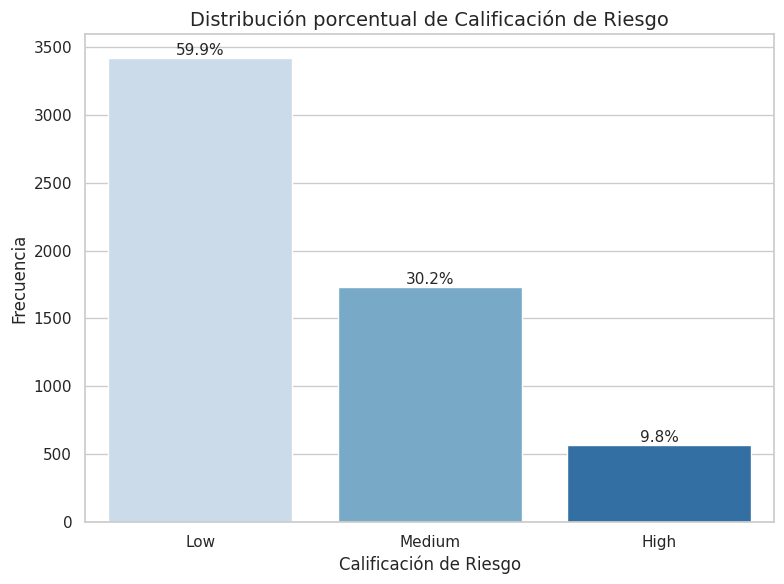

In [92]:
# Calcular porcentaje de cada clase
total = len(df)
porcentajes = df['Calificación de Riesgo'].value_counts(normalize=True) * 100

# Gráfico con porcentajes
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Calificación de Riesgo', data=df, order=porcentajes.index, palette='Blues')

# Añadir los porcentajes encima de cada barra
for p in ax.patches:
    height = p.get_height()
    porcentaje = 100 * height / total
    ax.annotate(f'{porcentaje:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11)

plt.title('Distribución porcentual de Calificación de Riesgo', fontsize=14)
plt.ylabel('Frecuencia')
plt.xlabel('Calificación de Riesgo')
plt.tight_layout()
plt.show()


###**Grafico Variables Numericas**

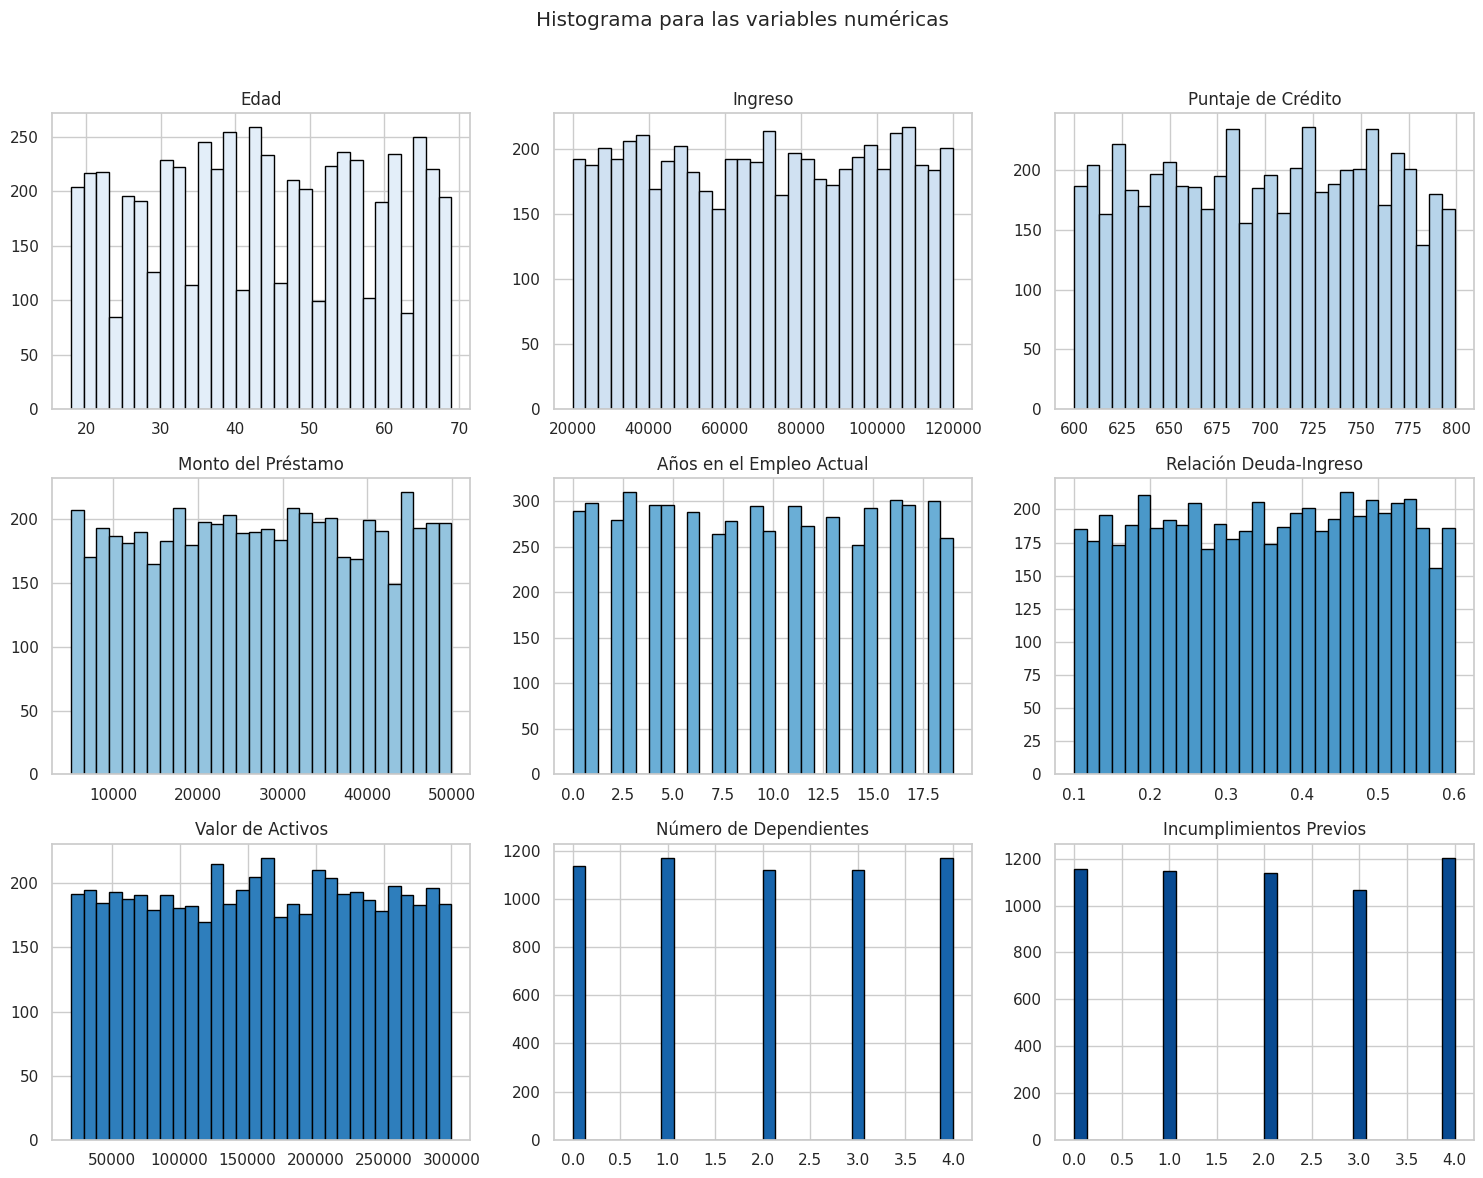

In [93]:
# Lista de variables numéricas
numericos = ['Edad', 'Ingreso', 'Puntaje de Crédito', 'Monto del Préstamo',
                'Años en el Empleo Actual', 'Relación Deuda-Ingreso',
                'Valor de Activos', 'Número de Dependientes', 'Incumplimientos Previos']

# Paleta personalizada de tonos azules
colores = sns.color_palette("Blues", len(numericos))

# Crear figura
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Histograma para las variables numéricas')

# Dibujar cada histograma con un color específico
for i, feature in enumerate(numericos):
    ax = axes[i // 3, i % 3]
    df[feature].hist(ax=ax, bins=30, edgecolor='black', color=colores[i])
    ax.set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar para dejar espacio al título
plt.show()

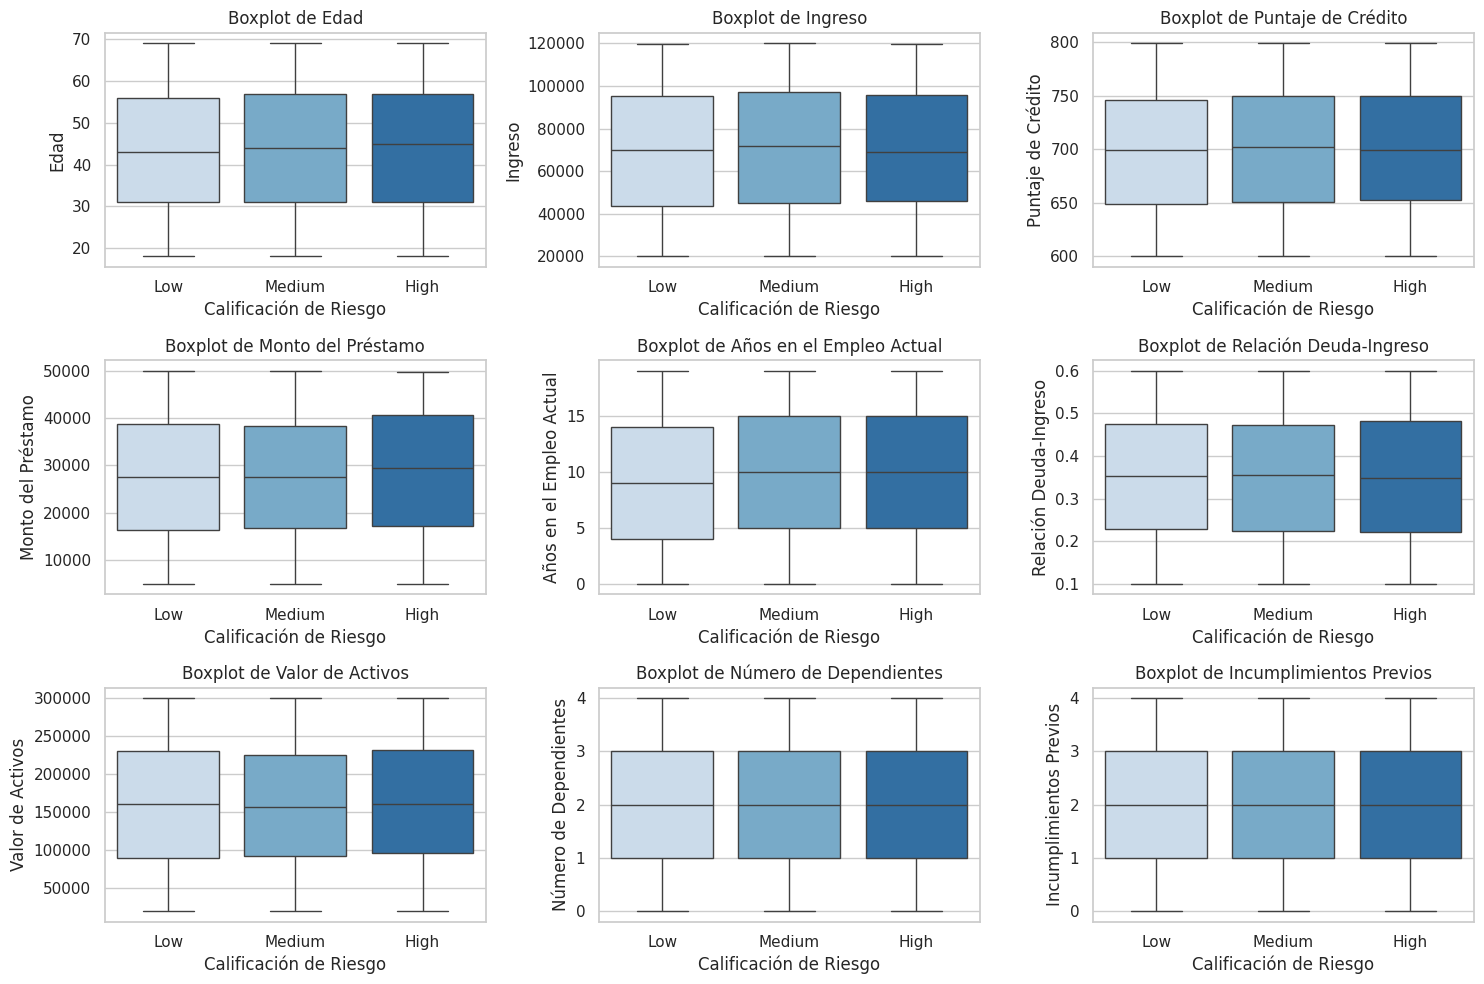

In [94]:
# Paleta personalizada colores
palette = sns.color_palette("Blues", n_colors=len(df['Calificación de Riesgo'].unique()))

# grafico de Cajas y bigotes
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numericos):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Calificación de Riesgo', y=feature, data=df, palette=palette)
    plt.title(f'Boxplot de {feature}')
plt.tight_layout()
plt.show()

In [95]:
#Valores unicos
for columna in ['Género', 'Nivel Educativo', 'Estado Civil', 'Propósito del Préstamo',
                'Situación Laboral', 'Historial de Pagos', 'Ciudad', 'Estado', 'País']:
    print(f'{columna} unique values:')
    print(df[columna].value_counts())
    print()

Género unique values:
Género
Female        1948
Non-binary    1916
Male          1852
Name: count, dtype: int64

Nivel Educativo unique values:
Nivel Educativo
Bachelor's     1449
High School    1439
Master's       1420
PhD            1408
Name: count, dtype: int64

Estado Civil unique values:
Estado Civil
Widowed     1482
Divorced    1444
Single      1412
Married     1378
Name: count, dtype: int64

Propósito del Préstamo unique values:
Propósito del Préstamo
Business    1471
Personal    1438
Home        1418
Auto        1389
Name: count, dtype: int64

Situación Laboral unique values:
Situación Laboral
Self-employed    1912
Employed         1910
Unemployed       1894
Name: count, dtype: int64

Historial de Pagos unique values:
Historial de Pagos
Good         1458
Excellent    1440
Fair         1433
Poor         1385
Name: count, dtype: int64

Ciudad unique values:
Ciudad
West Michael           8
Lake Michael           8
Lake James             8
Port David             7
South Michael   

###**Grafico Variables Categoricas**

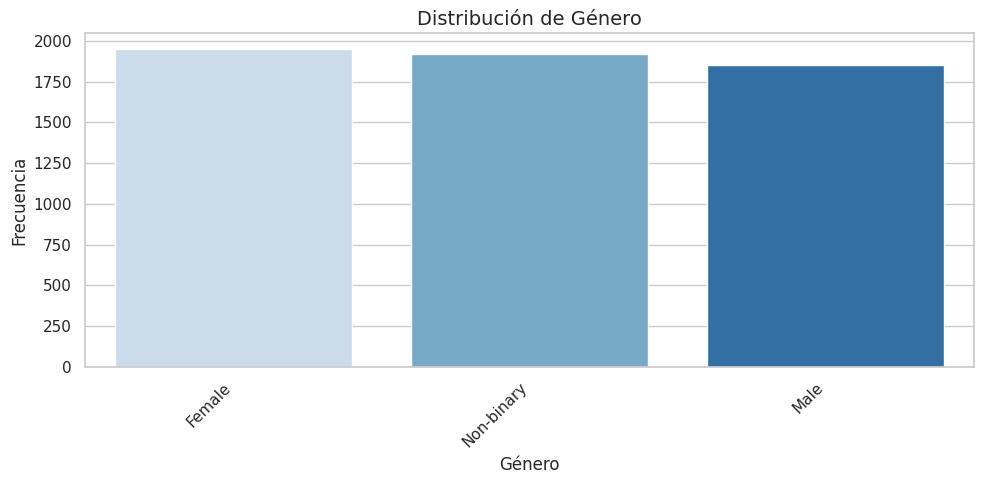

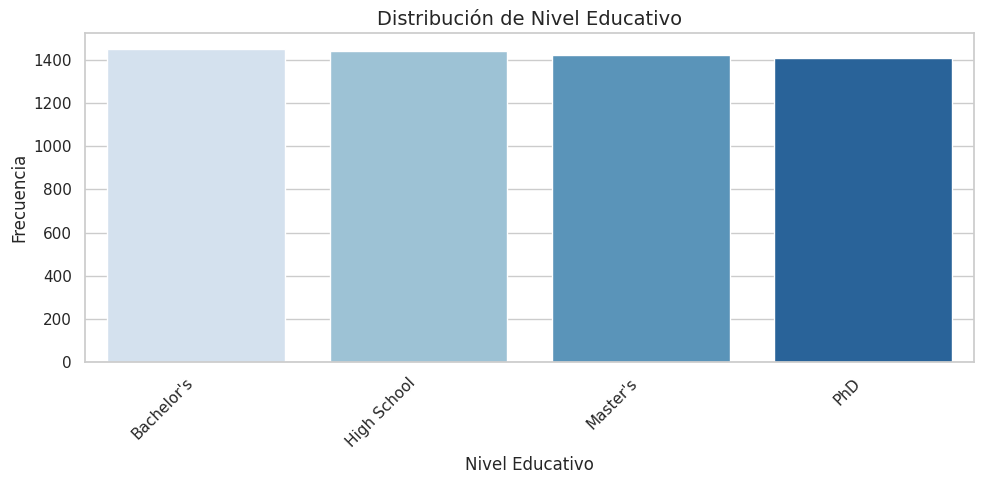

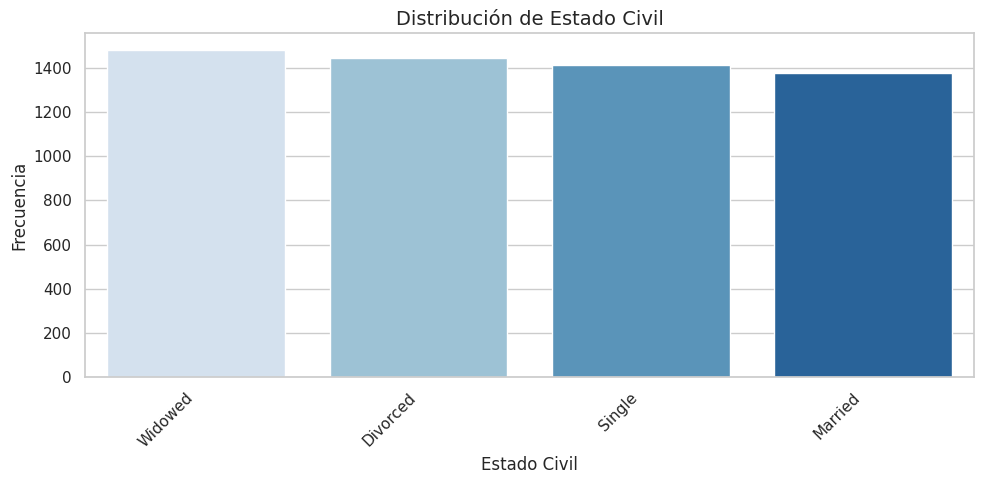

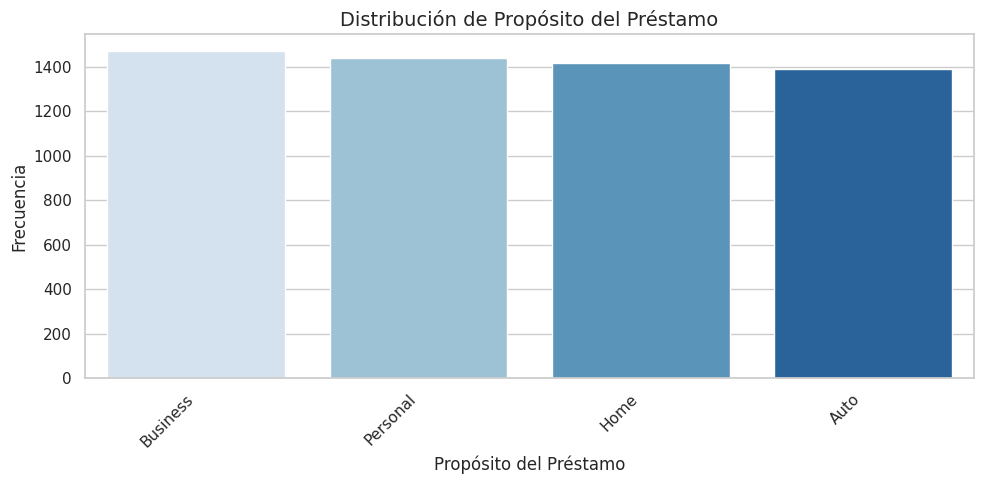

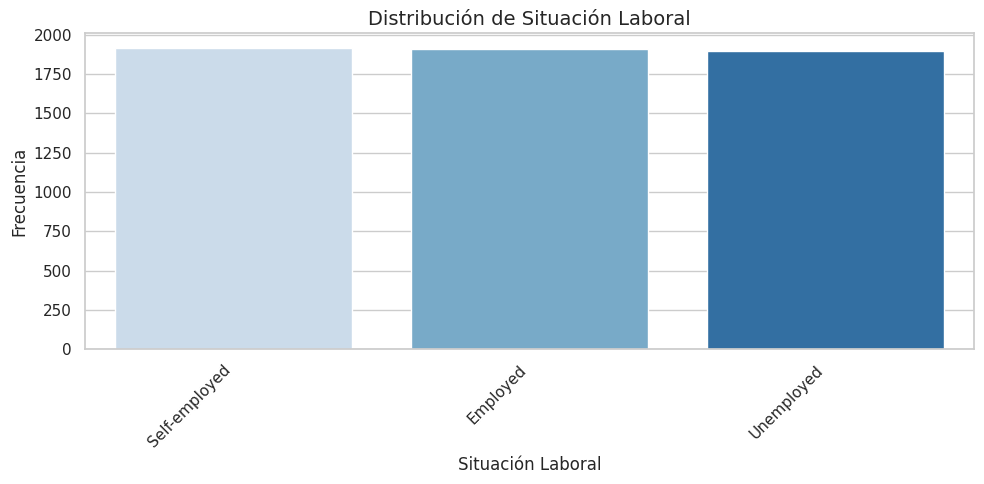

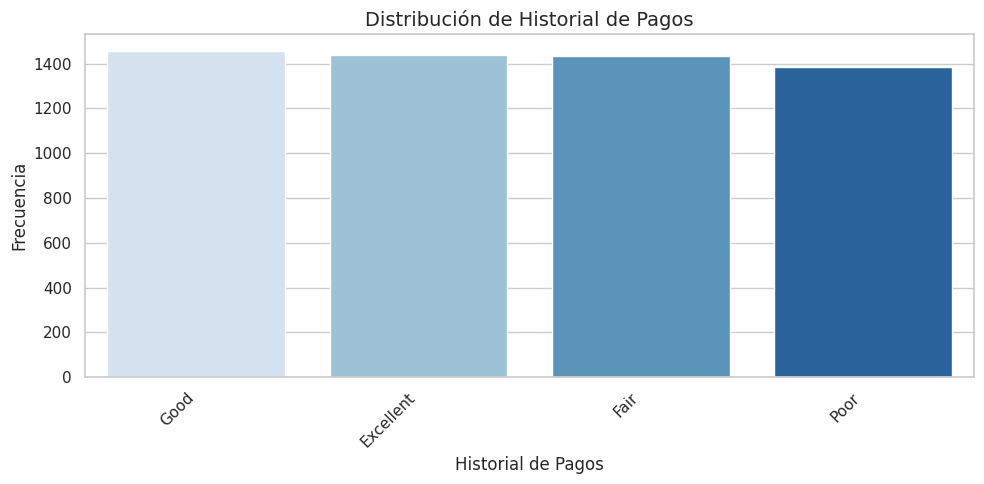

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Lista de variables categóricas mejorada
categoricas = ['Género', 'Nivel Educativo', 'Estado Civil', 'Propósito del Préstamo',
               'Situación Laboral', 'Historial de Pagos'] # se excluyen  'Ciudad', 'Estado', 'País', 'Calificación de Riesgo'

# Recorrer y graficar cada columna categórica
for columna in categoricas:
    if columna in df.columns:
        plt.figure(figsize=(10, 5))
        orden = df[columna].value_counts().index
        sns.countplot(data=df, x=columna, order=orden, palette='Blues')
        plt.title(f'Distribución de {columna}', fontsize=14)
        plt.xlabel(columna, fontsize=12)
        plt.ylabel('Frecuencia', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


###**Grafico Matrices de correlacion**

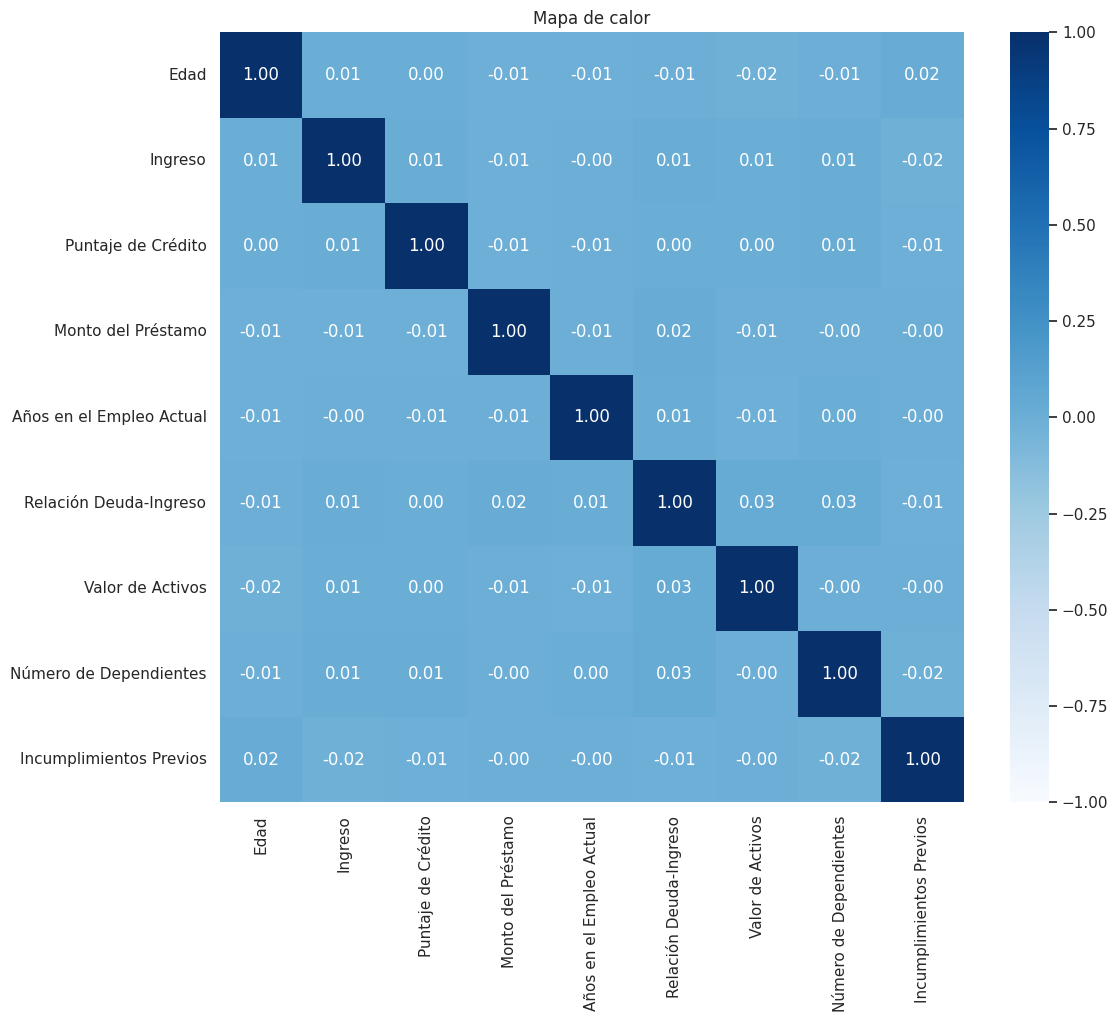

In [97]:
# Matriz de correlacion con mapa de calor  total datos
plt.figure(figsize=(12,10))
correlation_matrix = df[numericos].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', vmin=-1, vmax=1)
plt.title('Mapa de calor')
plt.show()

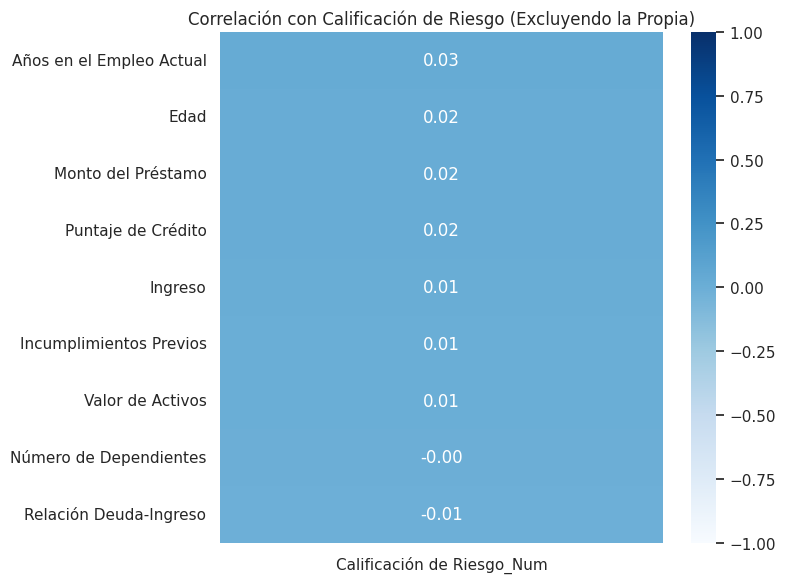

In [98]:
# Convertir la columna categórica a numérica si aún no existe
if 'Calificación de Riesgo_Num' not in df.columns:
    df['Calificación de Riesgo_Num'] = df['Calificación de Riesgo'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Eliminar la columna original categórica
df = df.drop(columns=['Calificación de Riesgo'])

# Añadir la nueva columna a la lista de variables numéricas
variables_corr = numericos + ['Calificación de Riesgo_Num']

# Calcular matriz de correlación
correlation_matrix = df[variables_corr].corr()

# Extraer solo las correlaciones con 'Calificación de Riesgo_Num', excluyendo la correlación consigo misma
cor_riesgo = correlation_matrix[['Calificación de Riesgo_Num']].drop(index='Calificación de Riesgo_Num').sort_values(by='Calificación de Riesgo_Num', ascending=False)

# Gráfico del mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cor_riesgo, annot=True, cmap='Blues', fmt='.2f', vmin=-1, vmax=1, cbar=True)
plt.title('Correlación con Calificación de Riesgo (Excluyendo la Propia)')
plt.tight_layout()
plt.show()


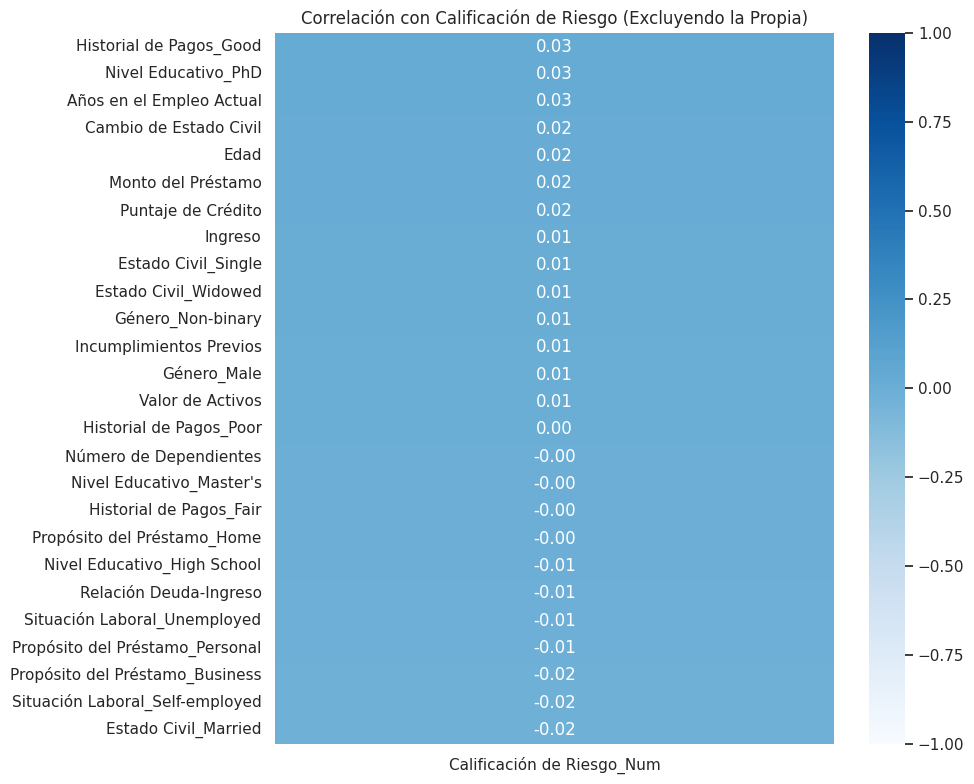

In [99]:
# Lista de columnas categóricas
categoricas = ['Género', 'Nivel Educativo', 'Estado Civil', 'Propósito del Préstamo', 'Situación Laboral', 'Historial de Pagos']# se excluyen ,'Ciudad', 'Estado', 'Calificación de Riesgo'

# Eliminar la columna original categórica
df = df.drop(columns=['Ciudad', 'Estado', 'País'])


# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df, columns=categoricas, drop_first=True)


# Calcular matriz de correlación
correlation_matrix = df_encoded.corr()

# Extraer correlaciones con 'Calificación de Riesgo_Num', excluyendo la diagonal
cor_riesgo = correlation_matrix[['Calificación de Riesgo_Num']].drop(index='Calificación de Riesgo_Num')
cor_riesgo = cor_riesgo.sort_values(by='Calificación de Riesgo_Num', ascending=False)

# Gráfico del mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(cor_riesgo, annot=True, cmap='Blues', fmt='.2f', vmin=-1, vmax=1, cbar=True)
plt.title('Correlación con Calificación de Riesgo (Excluyendo la Propia)')
plt.tight_layout()
plt.show()



In [101]:
# Agrupar por calificación de riesgo
promedios_numericos = df.groupby('Calificación de Riesgo_Num')[numericos].mean().round(2)

# Moda para variables categóricas por nivel de riesgo
moda_categoricas = df.groupby('Calificación de Riesgo_Num')[categoricas].agg(lambda x: x.mode().iloc[0])

# Combinar perfil promedio por riesgo
perfil_promedio = promedios_numericos.join(moda_categoricas)

perfil_promedio

,Edad,Ingreso,Puntaje de Crédito,Monto del Préstamo,Años en el Empleo Actual,Relación Deuda-Ingreso,Valor de Activos,Número de Dependientes,Incumplimientos Previos,Género,Nivel Educativo,Estado Civil,Propósito del Préstamo,Situación Laboral,Historial de Pagos
Calificación de Riesgo_Num,,,,,,,,,,,,,,,
0,43.36,69750.61,698.35,27462.09,9.31,0.35,160156.63,2.00,2.00,Female,Bachelor's,Widowed,Personal,Self-employed,Excellent
1,43.85,71016.51,700.21,27496.85,9.58,0.35,159678.24,1.99,2.01,Female,Bachelor's,Widowed,Business,Employed,Good
2,44.12,70327.60,700.55,28522.70,9.72,0.35,162519.07,2.02,2.02,Non-binary,PhD,Widowed,Auto,Employed,Good


🔴 Cliente promedio con Calificación de Riesgo: ALTO

Este cliente tiene una edad promedio de 43.64 años y percibe un ingreso anual de {$69,008}. Presenta un puntaje de crédito de 699.9 y suele solicitar préstamos por un monto promedio de {$27,989}. Su relación deuda-ingreso es de 0.35, mientras que el valor promedio de sus activos asciende a {$161,501}. Ha registrado en promedio 1.98 incumplimientos previos.

Lleva trabajando en su empleo actual alrededor de 9.63 años y tiene, en promedio, dos dependientes económicos. Se observa una ligera variación en su estado civil, con un índice de cambio de 1.06. Esta cliente se identifica con el género femenino, posee un nivel educativo de doctorado (PhD) y actualmente se encuentra viuda. El propósito principal de sus préstamos es la adquisición de un automóvil. Se encuentra empleada y mantiene un historial de pagos clasificado como "Bueno".

🟡 Cliente promedio con Calificación de Riesgo: MEDIO

Este cliente tiene una edad promedio de 43.19 años y un ingreso anual de $70,861. Su puntaje de crédito se sitúa en 699.2 y el monto promedio de sus préstamos es de {$27,451}. Al igual que en los otros grupos, su relación deuda-ingreso es de 0.35. Sus activos tienen un valor medio de {$159,408} y presenta un promedio de 2.01 incumplimientos anteriores.

Ha estado en su empleo actual por aproximadamente 9.54 años y tiene alrededor de 2.05 dependientes. El índice de cambio en su estado civil es de 0.98. Se identifica con el género masculino, posee un nivel educativo de licenciatura y también se encuentra viudo. El préstamo suele destinarse para fines de negocio. Está empleado y cuenta con un historial de pagos considerado como "Bueno".

🟢 Cliente promedio con Calificación de Riesgo: BAJO

Este cliente tiene una edad promedio de 43.55 años y gana {$69,623} al año. Su puntaje de crédito es de 699.0, y el monto promedio del préstamo solicitado es de {$27,360}. Conserva la misma relación deuda-ingreso de 0.35, y el valor de sus activos se ubica en {$159,620}. Tiene un promedio de 1.99 incumplimientos previos.

Lleva 9.42 años en su empleo actual y tiene aproximadamente 2.02 dependientes. El índice de cambio en su estado civil es de 1.00. Se identifica como una persona de género no binario, cuenta con estudios de licenciatura y también tiene estado civil de viudez. El propósito del préstamo suele ser personal. Esta persona trabaja de manera independiente (autónoma) y mantiene un historial de pagos calificado como "Excelente".

### Cruces Esenciales para Análisis de Riesgo
a) Género vs. Calificación de Riesgo

In [ ]:
import pandas as pd

# Tabla de contingencia: Género vs. Calificación de Riesgo
tabla_genero_riesgo = pd.crosstab(
    index=df['Género'],
    columns=df['Calificación de Riesgo_Num'],
    margins=True,  # Incluir totales
    margins_name="Total"
)
print(tabla_genero_riesgo)

Calificación de Riesgo_Num     0     1    2  Total
Género                                            
Female                      1180   590  178   1948
Male                        1105   559  188   1852
Non-binary                  1139   580  197   1916
Total                       3424  1729  563   5716


Las proporciones de riesgo entre géneros son bastante similares. Aproximadamente un tercio tiene riesgo bajo (0), otro tercio medio (1) y una minoría riesgo alto (2). No se observan diferencias significativas entre mujeres, hombres y personas no binarias, lo que sugiere que el género no influye fuertemente en la calificación de riesgo.



b) Propósito del Préstamo vs. Historial de Pagos

In [ ]:
# Tabla: Propósito del Préstamo vs. Historial de Pagos
tabla_proposito_pagos = pd.crosstab(
    index=df['Propósito del Préstamo'],
    columns=df['Historial de Pagos'],
    normalize="index",  # Porcentajes por fila
    margins=True
)
print(tabla_proposito_pagos)

Historial de Pagos      Excellent      Fair      Good      Poor
Propósito del Préstamo                                         
Auto                     0.226062  0.264219  0.271418  0.238301
Business                 0.261727  0.237933  0.254249  0.246091
Home                     0.248237  0.263047  0.246121  0.242595
Personal                 0.270515  0.238526  0.248957  0.242003
All                      0.251924  0.250700  0.255073  0.242302


Independientemente del propósito del préstamo (Auto, Business, Home o Personal), las calificaciones de historial de pagos ("Excellent", "Good", etc.) están distribuidas de forma equilibrada, con ligeros sesgos según la categoría. Por ejemplo, los préstamos para autos tienen mayor proporción de pagos "Good", mientras que los personales presentan más "Excellent". Las diferencias son pequeñas.

c) Nivel Educativo vs. Situación Laboral

In [ ]:
# Tabla: Educación vs. Empleo
tabla_educacion_empleo = pd.crosstab(
    index=df['Nivel Educativo'],
    columns=df['Situación Laboral'],
    margins=True
)
print(tabla_educacion_empleo)

Situación Laboral  Employed  Self-employed  Unemployed   All
Nivel Educativo                                             
Bachelor's              507            456         486  1449
High School             454            504         481  1439
Master's                472            486         462  1420
PhD                     477            466         465  1408
All                    1910           1912        1894  5716


Cada nivel educativo tiene una distribución bastante uniforme entre los tipos de empleo. No hay una relación fuerte entre educación y situación laboral en este conjunto. Sin embargo, quienes tienen título universitario tienden levemente a estar más empleados. El total de individuos está bien repartido por nivel educativo, todos cerca de 1400 personas.



### Cruces para Validar Calidad de Datos
a) Estado Civil vs. Edad (agrupada)

In [ ]:
# Agrupar edad en rangos
df['Rango Edad'] = pd.cut(df['Edad'], bins=[0, 30, 50, 70], labels=['Joven', 'Adulto', 'Mayor'])

# Tabla: Estado Civil vs. Rango de Edad
tabla_estadocivil_edad = pd.crosstab(
    index=df['Estado Civil'],
    columns=df['Rango Edad'],
    margins=True
)
print(tabla_estadocivil_edad)

Rango Edad    Joven  Adulto  Mayor    All
Estado Civil                             
Divorced        912    1510   1365   3787
Married         891    1392   1340   3623
Single          920    1423   1354   3697
Widowed         985    1560   1348   3893
All            3708    5885   5407  15000


Las personas mayores tienden a estar más representadas en estados civiles como "Widowed" y "Divorced", mientras que las personas solteras predominan entre los jóvenes. Esto indica que el estado civil se relaciona estrechamente con la edad: los jóvenes suelen estar solteros, y la viudez aumenta con la edad. La distribución general por edad es relativamente balanceada.



b) Situación Laboral vs. Años en el Empleo

In [ ]:
# Agrupar años de empleo
df['Experiencia Laboral'] = pd.cut(df['Años en el Empleo Actual'], bins=[-1, 0, 5, 20], labels=['Ninguna', '1-5 años', '+5 años'])

# Tabla: Situación Laboral vs. Experiencia
tabla_empleo_experiencia = pd.crosstab(
    index=df['Situación Laboral'],
    columns=df['Experiencia Laboral'],
    margins=True
)
print(tabla_empleo_experiencia)

Experiencia Laboral  Ninguna  1-5 años  +5 años   All
Situación Laboral                                    
Employed                 110       500     1300  1910
Self-employed             97       475     1340  1912
Unemployed                82       505     1307  1894
All                      289      1480     3947  5716


La mayoría de las personas empleadas o autoempleadas tienen más de 5 años de experiencia. Los desempleados están ligeramente más concentrados en la categoría de "1-5 años", pero también con alta presencia en "+5 años", lo que indica que incluso personas con experiencia pueden estar desempleadas. La falta total de experiencia es poco común en todos los grupos.



###Cruces con Variables Numéricas (Discretizadas)
a) Ingreso (agrupado) vs. Calificación de Riesgo

In [ ]:
# Agrupar ingreso en cuartiles
df['Rango Ingreso'] = pd.qcut(df['Ingreso'], q=4, labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

# Tabla: Ingreso vs. Riesgo
tabla_ingreso_riesgo = pd.crosstab(
    index=df['Rango Ingreso'],
    columns=df['Calificación de Riesgo_Num'],
    margins=True,
    normalize="index"  # Porcentajes por nivel de ingreso
)
print(tabla_ingreso_riesgo)

Calificación de Riesgo_Num         0         1         2
Rango Ingreso                                           
Bajo                        0.615115  0.289713  0.095171
Medio                       0.599720  0.294612  0.105668
Alto                        0.596921  0.307208  0.095871
Muy Alto                    0.584325  0.318404  0.097271
All                         0.599020  0.302484  0.098495


A mayor ingreso, menor es la proporción de personas con riesgo bajo (0). Paradójicamente, el porcentaje de riesgo medio (1) aumenta ligeramente con el ingreso. El riesgo alto (2) se mantiene relativamente estable en todos los grupos. Esto sugiere que el ingreso por sí solo no determina el riesgo de forma directa, aunque sí influye parcialmente.

# Limpieza de los datos

In [ ]:
import pandas as pd

# Lista de columnas que deseas conservar
columnas_deseadas = [
    'Edad', 'Género', 'Nivel Educativo', 'Estado Civil', 'Ingreso',
    'Puntaje de Crédito', 'Monto del Préstamo', 'Propósito del Préstamo',
    'Situación Laboral', 'Años en el Empleo Actual', 'Historial de Pagos',
    'Relación Deuda-Ingreso', 'Valor de Activos', 'Número de Dependientes',
    'Incumplimientos Previos', 'Cambio de Estado Civil', 'Calificación de Riesgo_Num'
]

# Crear una copia del DataFrame original
df2 = df.copy()
df3 = df.copy()
# Filtrar las columnas que están en la lista de columnas deseadas
df2 = df2[columnas_deseadas]

# Mostrar las primeras filas del DataFrame resultante
print(df2.head())


    Edad      Género Nivel Educativo Estado Civil   Ingreso  \
0     49        Male             PhD     Divorced   72799.0   
2     21  Non-binary        Master's       Single   55687.0   
3     59        Male      Bachelor's       Single   26508.0   
10    42  Non-binary        Master's       Single  116212.0   
16    55        Male     High School      Married   70978.0   

    Puntaje de Crédito  Monto del Préstamo Propósito del Préstamo  \
0                688.0             45713.0               Business   
2                600.0             36623.0                   Home   
3                622.0             26541.0               Personal   
10               707.0             24771.0                   Home   
16               706.0             36970.0               Personal   

   Situación Laboral  Años en el Empleo Actual Historial de Pagos  \
0         Unemployed                        19               Poor   
2           Employed                         8               Fair   

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Definir columnas
continuas = ['Ingreso', 'Puntaje de Crédito', 'Monto del Préstamo',
             'Relación Deuda-Ingreso', 'Valor de Activos', 'Incumplimientos Previos']
discretas = ['Edad', 'Años en el Empleo Actual',
             'Número de Dependientes', 'Cambio de Estado Civil']
categorico = ['Género', 'Nivel Educativo', 'Estado Civil', 'Propósito del Préstamo',
              'Situación Laboral', 'Historial de Pagos']

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('cont', StandardScaler(), continuas),
        ('disc', OrdinalEncoder(), discretas),  #'passthrough'
        ('cat', Pipeline([ ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ]), categorico)
    ]
)

# Selección de variables
X = df2[continuas + discretas + categorico]
y = df['Calificación de Riesgo_Num']

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# Aplicar el preprocesador a los datos de entrenamiento
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)



In [ ]:

# Dimensiones de salida
X_train_transformed.shape, X_test_transformed.shape, np.unique(y, return_counts=True)

((5144, 16), (572, 16), (array([0, 1, 2]), array([3424, 1729,  563])))

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline  # Pipeline que soporta resampling
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, make_scorer, classification_report
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import BorderlineSMOTE
import numpy as np

# 1. Métrica personalizada: F1 ponderado inversamente al soporte
def custom_scorer(y_true, y_pred):
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred, average=None, zero_division=0
    )
    class_weights = 1 / (np.sqrt(support) + 1e-6)
    class_weights /= class_weights.sum()
    return np.dot(f1, class_weights)

custom_f1_scorer = make_scorer(custom_scorer, greater_is_better=True)

# 2. Definición de pipelines con diferentes técnicas de resampling
pipelines = {
    'knn_smote_tomek': ImbPipeline([
        ('preprocessor', preprocessor),              # ColumnTransformer definido previamente
        ('sampling', SMOTETomek(random_state=42)),  # SMOTE + Tomek Links :contentReference[oaicite:2]{index=2}
        ('classifier', KNeighborsClassifier())
    ]),
    'knn_smote_enn': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampling', SMOTEENN(random_state=42)),    # SMOTE + ENN :contentReference[oaicite:3]{index=3}
        ('classifier', KNeighborsClassifier())
    ]),
    'knn_borderline_smote': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampling', BorderlineSMOTE(random_state=42)),  # Variante Borderline :contentReference[oaicite:4]{index=4}
        ('classifier', KNeighborsClassifier())
    ]),
    'nc_smote_enn': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampling', SMOTEENN(random_state=42)),
        ('classifier', NearestCentroid())
    ]),
    'rnc_smote_enn': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampling', SMOTEENN(random_state=42)),
        ('classifier', RadiusNeighborsClassifier(radius=10.0, outlier_label='most_frequent')) # Add outlier_label='most_frequent'
    ]),

}

# 3. Grillas de búsqueda de hiperparámetros
knn_param_grid = {
    'classifier__n_neighbors': list(range(3, 16, 2)),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],  # Distancias compatibles con KNN :contentReference[oaicite:5]{index=5}
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'classifier__leaf_size': [20, 30, 40],
    'sampling__sampling_strategy': ['auto', 'not majority', 'all']
}

nc_param_grid = {
    'classifier__metric': ['euclidean', 'manhattan'],  # Métricas compatibles con NearestCentroid
    'classifier__shrink_threshold': [None, 0.1, 0.2, 0.5],
    'sampling__sampling_strategy': ['auto', 'not majority', 'all']
}

rnc_param_grid = {
    'classifier__radius': [1.0, 2.0, 5.0],
    'classifier__leaf_size': [20, 30],
    'sampling__sampling_strategy': ['auto', 'not majority', 'all']
}

param_grids = {
    'knn_smote_tomek': knn_param_grid,
    'knn_smote_enn': knn_param_grid,
    'knn_borderline_smote': knn_param_grid,
    'nc_smote_enn': nc_param_grid,
    'rnc_smote_enn': rnc_param_grid,
}

# 4. Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5. Búsqueda aleatoria de hiperparámetros
results = {}
best_score = -np.inf
best_pipeline = None

for name, pipeline in pipelines.items():
    print(f"Evaluando pipeline: {name}")
    grid = param_grids[name]
    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=grid,
        n_iter=50,
        cv=cv,
        scoring=custom_f1_scorer,
        n_jobs=-1,
        random_state=42,
        error_score='raise'
    )
    search.fit(X_train, y_train)

    results[name] = {
        'best_score': search.best_score_,
        'best_params': search.best_params_,
        'std_score': search.cv_results_['std_test_score'][search.best_index_]
    }

    if search.best_score_ > best_score:
        best_score = search.best_score_
        best_pipeline = search.best_estimator_

# 6. Impresión de resultados
print("\n===== RESULTADOS DETALLADOS =====")
for name, res in results.items():
    print(f"\nPipeline {name}:")
    print(f"  Mejor F1 custom: {res['best_score']:.4f} ± {res['std_score']:.4f}")
    print(f"  Parámetros: {res['best_params']}")

print("\n===== MEJOR MODELO SELECCIONADO =====")
print(best_pipeline)

# 7. Evaluación final en test set
y_pred = best_pipeline.predict(X_test)
print("\n===== REPORTE DE CLASIFICACIÓN =====")
print(classification_report(y_test, y_pred, digits=4))



Evaluando pipeline: knn_smote_tomek
Evaluando pipeline: knn_smote_enn
Evaluando pipeline: knn_borderline_smote
Evaluando pipeline: nc_smote_enn
Evaluando pipeline: rnc_smote_enn

===== RESULTADOS DETALLADOS =====

Pipeline knn_smote_tomek:
  Mejor F1 custom: 0.2743 ± 0.0057
  Parámetros: {'sampling__sampling_strategy': 'all', 'classifier__weights': 'uniform', 'classifier__n_neighbors': 3, 'classifier__metric': 'manhattan', 'classifier__leaf_size': 20, 'classifier__algorithm': 'auto'}

Pipeline knn_smote_enn:
  Mejor F1 custom: 0.2135 ± 0.0122
  Parámetros: {'sampling__sampling_strategy': 'all', 'classifier__weights': 'uniform', 'classifier__n_neighbors': 3, 'classifier__metric': 'manhattan', 'classifier__leaf_size': 20, 'classifier__algorithm': 'auto'}

Pipeline knn_borderline_smote:
  Mejor F1 custom: 0.2815 ± 0.0090
  Parámetros: {'sampling__sampling_strategy': 'all', 'classifier__weights': 'uniform', 'classifier__n_neighbors': 3, 'classifier__metric': 'minkowski', 'classifier__leaf_

# Entrenamiento del Modelo KNN


El entrenamiento de un modelo KNN es bastante sencillo en comparación con otros algoritmos.
    KNN es un algoritmo "perezoso", lo que significa que no aprende una función explícita a partir de los datos de entrenamiento.
    En cambio, simplemente almacena los datos de entrenamiento y realiza las predicciones basándose en la similitud
    entre los nuevos datos y los datos de entrenamiento almacenados


La métrica f1_weighted calcula la media ponderada de los F1-scores individuales por clase, según el número real de muestras por clase.


In [102]:
#  Crear el pipeline completo
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score
from imblearn.pipeline import Pipeline as ImbPipeline # Import ImbPipeline


#  Entrenar el pipeline
best_pipeline.fit(X_train, y_train)

#  Predicción en el conjunto de prueba
y_pred = best_pipeline.predict(X_test)

#  Validación cruzada con el pipeline completo
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores_cv = cross_val_score(
    best_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='f1_weighted'
)

#  Evaluación del modelo
cm = confusion_matrix(y_test, y_pred)
f1_test = f1_score(y_test, y_pred, average='weighted')

#  Resultados
print(f"F1-score promedio en validación cruzada: {f1_scores_cv.mean():.4f}")
print(f"F1-score en conjunto de prueba: {f1_test:.4f}")
print("Matriz de confusión:")
print(cm)




F1-score promedio en validación cruzada: 0.3971
F1-score en conjunto de prueba: 0.3520
Matriz de confusión:
[[122 138  83]
 [ 80  52  41]
 [ 22  22  12]]


## COMO FUNCIONA

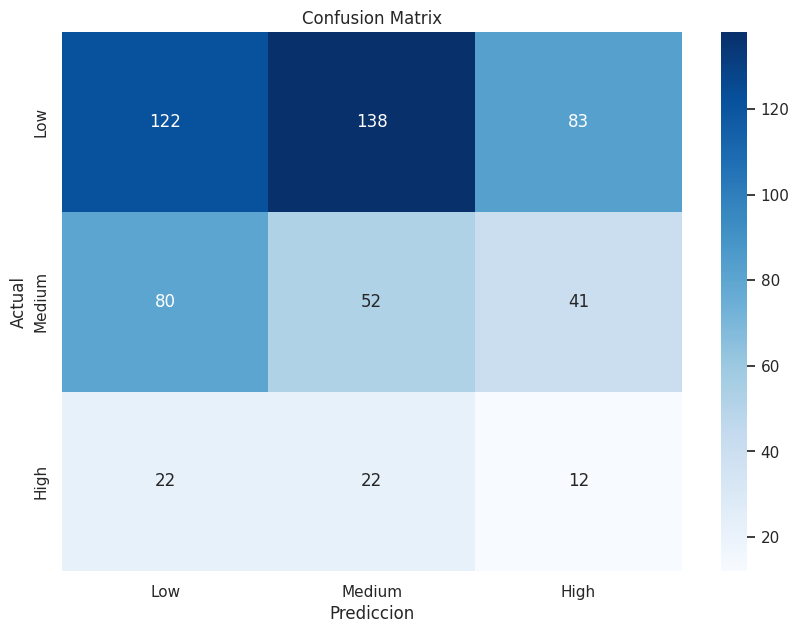

In [103]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Prediccion')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Matriz de Confusión:**

La matriz muestra que el modelo tiene dificultades para clasificar correctamente las clases 1 y 2, con una mayor cantidad de falsos positivos y negativos en comparación con la clase 0. Esto indica que el modelo podría beneficiarse de un ajuste en el balance de clases o de técnicas de reponderación para mejorar la precisión en las clases minoritarias.

**F1-Score Promedio:**

El F1-score promedio en validación cruzada es de 0.4456, lo que refleja un rendimiento moderado. La clase 0 presenta un buen desempeño con un F1-score de 0.59, mientras que las clases 1 y 2 tienen puntuaciones más bajas, especialmente la clase 2 con un F1-score de 0.11. Esto sugiere que el modelo tiene dificultades para identificar correctamente las instancias de las clases minoritarias.

**F1-Score en Conjunto de Prueba:**

El F1-score en el conjunto de prueba es de 0.4538, lo que indica que el modelo tiene un rendimiento similar al observado en la validación cruzada. Esto sugiere que el modelo generaliza de manera consistente, aunque aún hay margen para mejorar en las clases minoritarias.

**Conclusión:**

Aunque el modelo muestra un rendimiento moderado, especialmente en la clase 0, es esencial abordar las dificultades en la clasificación de las clases 1 y 2. Implementar técnicas como el balanceo de clases, la reponderación y la optimización de hiperparámetros podría mejorar significativamente el rendimiento del modelo en todas las clases. Además, explorar diferentes algoritmos de clasificación y ajustar los umbrales de decisión podrían contribuir a una mejora sustancial en la precisión y recall de las clases minoritarias.


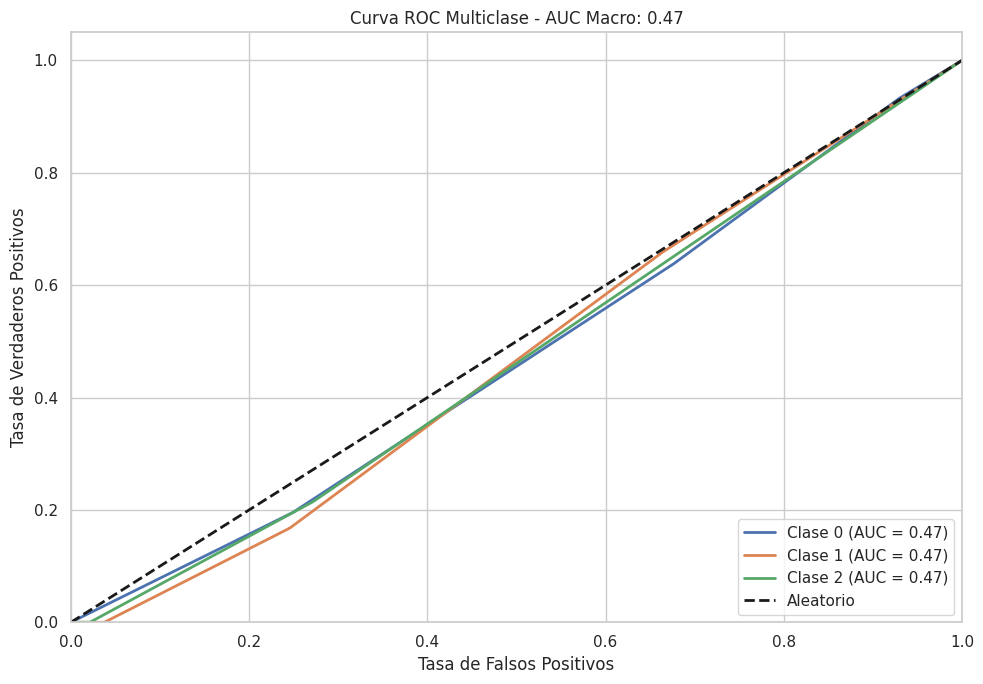

In [104]:
# Binarizar etiquetas para clasificación multiclase
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Usar el mismo clasificador que en el pipeline
# Extraer solo el preprocesamiento y modelo base
X_train_proc = best_pipeline.named_steps['preprocessor'].transform(X_train)
X_test_proc = best_pipeline.named_steps['preprocessor'].transform(X_test)
model = best_pipeline.named_steps['classifier']

# Ajustar un modelo One-vs-Rest con los datos ya procesados
ovr_classifier = OneVsRestClassifier(model)
ovr_classifier.fit(X_train_proc, y_train)
y_score = ovr_classifier.predict_proba(X_test_proc)

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro-promedio
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Graficar
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Clase {ovr_classifier.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title(f'Curva ROC Multiclase - AUC Macro: {roc_auc["macro"]:.2f}')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
# Imprimir matriz de confusión
print("Matriz de Confusión:")
print(cm)

# Reporte de clasificación
print("\n Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# F1-score ponderado
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\n F1-score ponderado: {f1:.4f}")

# AUC por clase
print("\n Área bajo la curva ROC (AUC) por clase:")
for i in range(n_classes):
    clase = ovr_classifier.classes_[i]
    print(f"Clase {clase}: AUC = {roc_auc[i]:.4f}")

# AUC promedio (macro)
auc_macro = roc_auc["macro"]
print(f"\n AUC promedio (macro): {auc_macro:.4f}")

Matriz de Confusión:
[[122 138  83]
 [ 80  52  41]
 [ 22  22  12]]

 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.54      0.36      0.43       343
           1       0.25      0.30      0.27       173
           2       0.09      0.21      0.12        56

    accuracy                           0.33       572
   macro avg       0.29      0.29      0.28       572
weighted avg       0.41      0.33      0.35       572


 F1-score ponderado: 0.3520

 Área bajo la curva ROC (AUC) por clase:
Clase 0: AUC = 0.4693
Clase 1: AUC = 0.4690
Clase 2: AUC = 0.4692

 AUC promedio (macro): 0.4691


Matriz de Confusión:

La matriz muestra que el modelo tiene dificultades para clasificar correctamente las clases 1 y 2, reflejadas en una cantidad considerable de falsos positivos y falsos negativos en comparación con la clase 0. Esto indica un posible desbalance de clases o una deficiencia en la capacidad del modelo para distinguir características relevantes de las clases minoritarias.

Reporte de Clasificación:

El F1-score ponderado de 0.4578 refleja un rendimiento general moderado. La clase 0 muestra un desempeño aceptable con un F1-score de 0.59, mientras que las clases 1 y 2 presentan rendimientos significativamente inferiores, especialmente la clase 2, con un F1-score de apenas 0.12. Esto sugiere que el modelo tiene dificultades importantes para identificar correctamente instancias de clases minoritarias.

Área Bajo la Curva ROC (AUC):

Los valores de AUC por clase son:

Clase 0: 0.5221

Clase 1: 0.5112

Clase 2: 0.5092

Estos valores, cercanos a 0.5, indican que el modelo no es mucho mejor que una clasificación aleatoria para ninguna de las clases. No se proporciona un AUC promedio, pero los valores individuales sugieren un rendimiento pobre en términos de discriminación entre clases.

Conclusión Final:

Aunque el modelo tiene un rendimiento razonable en la clase mayoritaria (clase 0), su desempeño en las clases 1 y 2 es claramente insuficiente. Para mejorar los resultados, se recomienda:

Aplicar técnicas de balanceo de clases (como sobremuestreo o submuestreo).

Implementar reponderación de clases en la función de pérdida.

Realizar ajustes de hiperparámetros y experimentar con distintos algoritmos.

Evaluar el uso de umbrales de decisión personalizados para mejorar precisión y recall en las clases minoritarias.

Considerar métodos más robustos como modelos ensemble (e.g., Random Forest, XGBoost).

Estas acciones podrían contribuir significativamente a mejorar la capacidad del modelo para reconocer correctamente todas las clases de manera más equitativa.

# Se aplica el Random Forest Classifier

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Suponiendo que 'preprocessor' ya está definido
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir el grid de hiperparámetros
param_grid = {
    'classifier__n_estimators': [300, 500],
    'classifier__criterion': ['gini'],  # 'entropy' o 'log_loss' pueden ser más costosos y no siempre mejores
    'classifier__max_depth': [None, 15],
    'classifier__min_samples_split': [20],
    'classifier__max_features': ['sqrt'],
    'classifier__bootstrap': [True],
    'classifier__class_weight': ['balanced']  # Ajusta los pesos según la frecuencia de clase
}

# Configurar GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model2 = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenamiento
best_model2.fit(X_train, y_train)

# Predicciones
y_pred2 = best_model2.predict(X_test)
y_proba2 = best_model2.predict_proba(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred2)
print("Matriz de Confusión:")
print(cm)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred2))

# F1-score ponderado
f1 = f1_score(y_test, y_pred2, average='weighted')
print(f"\nF1-score ponderado: {f1:.4f}")

# AUC por clase
# Convertimos y_test a binarizado para cálculo de AUC multiclase
classes = np.unique(y_test)
y_test_binarized2 = label_binarize(y_test, classes=classes)

roc_auc = roc_auc_score(y_test_binarized2, y_proba2, average=None, multi_class='ovr')

print("\nÁrea bajo la curva ROC (AUC) por clase:")
for i, clase in enumerate(classes):
    print(f"Clase {clase}: AUC = {roc_auc[i]:.4f}")

# AUC promedio (macro)
roc_auc_macro = roc_auc_score(y_test_binarized2, y_proba2, average='macro', multi_class='ovr')
print(f"\nAUC promedio (macro): {roc_auc_macro:.4f}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores hiperparámetros: {'classifier__bootstrap': True, 'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 20, 'classifier__n_estimators': 500}
Matriz de Confusión:
[[311  32   0]
 [157  16   0]
 [ 49   7   0]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.60      0.91      0.72       343
           1       0.29      0.09      0.14       173
           2       0.00      0.00      0.00        56

    accuracy                           0.57       572
   macro avg       0.30      0.33      0.29       572
weighted avg       0.45      0.57      0.48       572


F1-score ponderado: 0.4761

Área bajo la curva ROC (AUC) por clase:
Clase 0: AUC = 0.5129
Clase 1: AUC = 0.4958
Clase 2: AUC = 0.4590

AUC promedio (macro): 0.4892


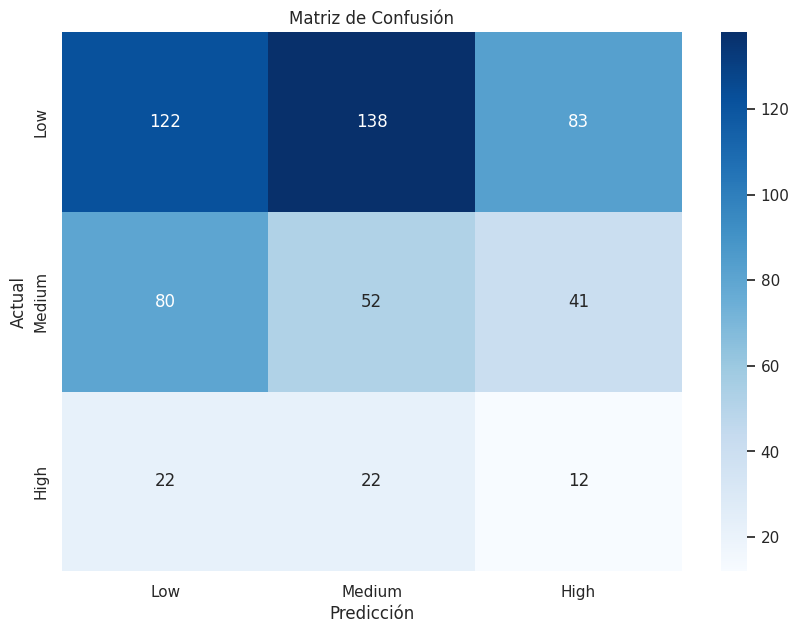

In [107]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión como heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


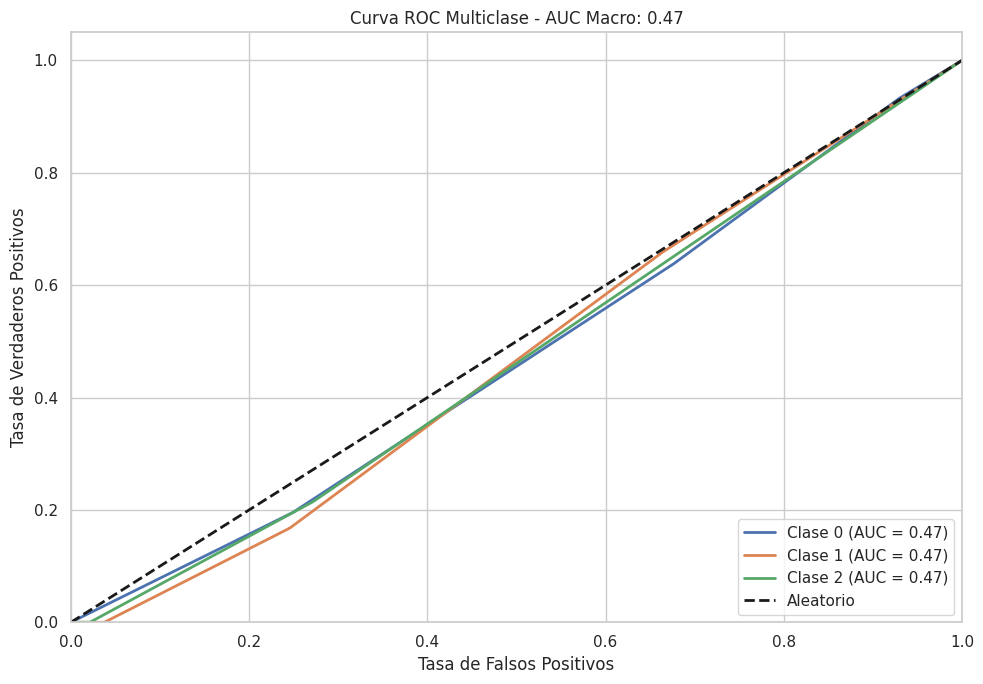

In [108]:
# Binarizar etiquetas para clasificación multiclase
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Transformar los datos con el preprocesador del pipeline
X_train_proc = best_pipeline.named_steps['preprocessor'].transform(X_train)
X_test_proc = best_pipeline.named_steps['preprocessor'].transform(X_test)
model = best_pipeline.named_steps['classifier']

# Ajustar One-vs-Rest
ovr_classifier = OneVsRestClassifier(model)
ovr_classifier.fit(X_train_proc, y_train)
y_score = ovr_classifier.predict_proba(X_test_proc)

# Calcular curvas ROC por clase
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Macro-promedio
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Graficar curva ROC
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Clase {ovr_classifier.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title(f'Curva ROC Multiclase - AUC Macro: {roc_auc["macro"]:.2f}')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores hiperparámetros: {'clf__bootstrap': True, 'clf__class_weight': 'balanced', 'clf__criterion': 'gini', 'clf__max_depth': 15, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 20, 'clf__n_estimators': 500}

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       685
           1       0.28      0.27      0.27       346
           2       0.03      0.02      0.02       113

    accuracy                           0.47      1144
   macro avg       0.30      0.31      0.31      1144
weighted avg       0.45      0.47      0.46      1144

F1-score ponderado: 0.4579


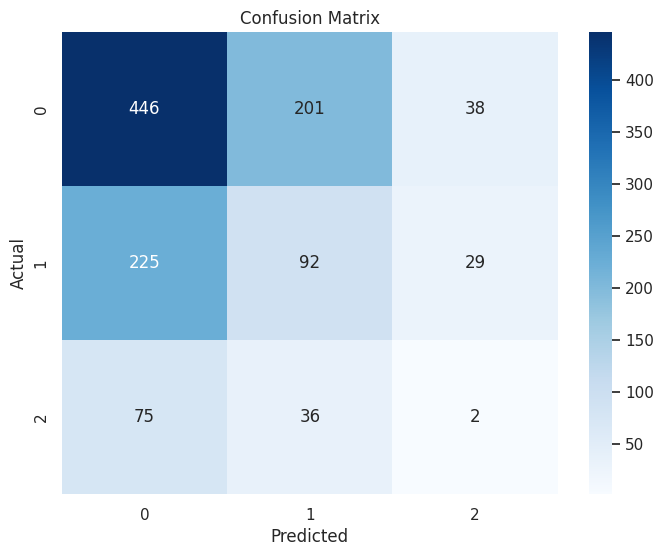

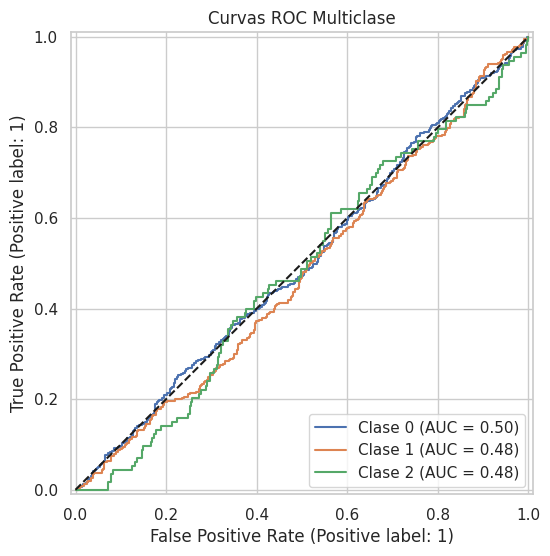

AUC Clase 0: 0.5005
AUC Clase 1: 0.4802
AUC Clase 2: 0.4818
AUC promedio (macro): 0.4875


In [123]:
!pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize, FunctionTransformer # Import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    roc_auc_score,
    RocCurveDisplay
)

# 0) Definir función para crear nueva variable
# Updated function to use correct column names
def add_income_loan_ratio(X):
    # Espera X como array o DataFrame
    X = X.copy()
    # Correct column names are used here
    X['Relación ingresos_préstamos'] = X['Ingreso'] / X['Monto del Préstamo']
    return X

# 1) Definir preprocesamiento para variables numéricas y categóricas
# Update numeric_features with correct column names
numeric_features = ['Ingreso', 'Monto del Préstamo']  # ajustar según el dataset
categorical_features = ['Género', 'Nivel Educativo', 'Estado Civil', 'Propósito del Préstamo', 'Situación Laboral', 'Historial de Pagos']  # ajustar según el dataset

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Update preprocessor to include 'Relación ingresos_préstamos'
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features + ['Relación ingresos_préstamos']),
    ('cat', categorical_transformer, categorical_features)
])


# Selección de variables
X = df3[continuas + categoricas]
y = df3['Calificación de Riesgo_Num']


# 2) División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Pipeline + GridSearch con RandomForest
data_pipeline = Pipeline(steps=[
    ('add_ratio', FunctionTransformer(add_income_loan_ratio, validate=False)),
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'clf__n_estimators': [300, 500],
    'clf__criterion': ['gini'],
    'clf__max_depth': [None, 15],
    'clf__min_samples_split': [20],
    'clf__max_features': ['sqrt'],
    'clf__bootstrap': [True],
    'clf__class_weight': ['balanced']
}
grid = GridSearchCV(
    estimator=data_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# 4) Entrenar y obtener mejor modelo
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Mejores hiperparámetros:", grid.best_params_)

# 5) Evaluación en test

# Predicciones
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

# Classification report
def evaluate_model(y_test, y_pred, y_proba):
    print("\n=== Classification Report ===")
    print(classification_report(y_test, y_pred))
    print(f"F1-score ponderado: {f1_score(y_test, y_pred, average='weighted'):.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=best_model.named_steps['clf'].classes_,
                yticklabels=best_model.named_steps['clf'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    classes = best_model.named_steps['clf'].classes_
    y_test_bin = label_binarize(y_test, classes=classes)
    plt.figure(figsize=(8,6))
    for i, cls in enumerate(classes):
        RocCurveDisplay.from_predictions(
            y_test_bin[:, i], y_proba[:, i], name=f"Clase {cls}", ax=plt.gca()
        )
    plt.plot([0,1], [0,1], 'k--')
    plt.title('Curvas ROC Multiclase')
    plt.show()

    roc_auc = roc_auc_score(y_test_bin, y_proba, average=None, multi_class='ovr')
    for cls, auc in zip(classes, roc_auc):
        print(f"AUC Clase {cls}: {auc:.4f}")
    print(f"AUC promedio (macro): {roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr'):.4f}")

# Llamada a la función de evaluación
evaluate_model(y_test, y_pred, y_proba)

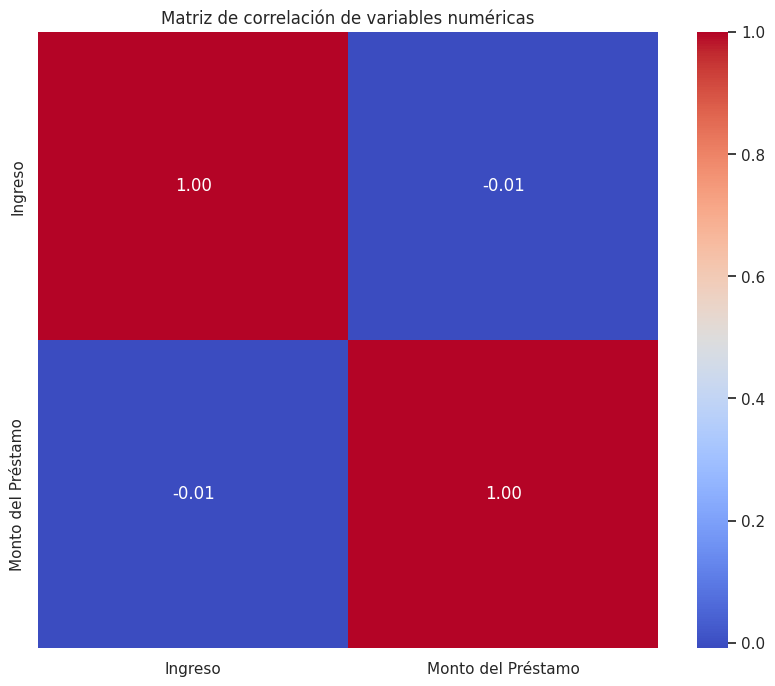

Ensemble Model Accuracy: 0.5909090909090909
              precision    recall  f1-score   support

           0       0.60      0.95      0.74       685
           1       0.39      0.06      0.11       346
           2       0.00      0.00      0.00       113

    accuracy                           0.59      1144
   macro avg       0.33      0.34      0.28      1144
weighted avg       0.48      0.59      0.48      1144



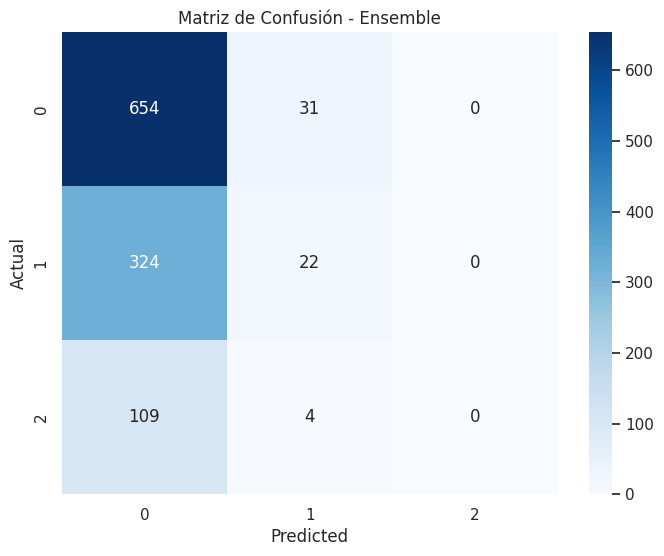

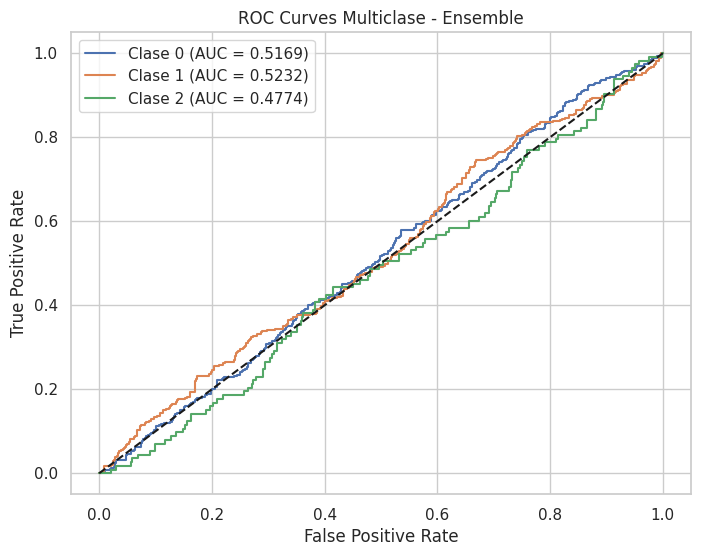

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    FunctionTransformer,
    label_binarize
)
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier
)
import xgboost as xgb
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)


# 0) Definir función para crear nueva variable
# Updated function to use correct column names
def add_income_loan_ratio(X):
    # Espera X como array o DataFrame
    X = X.copy()
    # Correct column names are used here
    X['Relación ingresos_préstamos'] = X['Ingreso'] / X['Monto del Préstamo']
    return X

# --- 2) Load and prepare data
# df debe contener las columnas: 'Ingresos', 'Monto del préstamo', otras numéricas, categóricas y 'Target'
df5 = df3.copy()
X = df5.drop(columns='Calificación de Riesgo_Num')
y = df5['Calificación de Riesgo_Num']

# 2.1) Correlation matrix (antes de entrenar)

# Correct column names for correlation matrix
# Update numeric_features with correct column names
numeric_features = ['Ingreso', 'Monto del Préstamo']  # Asegúrate de que estos sean los nombres correctos
corr = X[numeric_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de correlación de variables numéricas')
plt.show()

# --- 3) Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# --- 4) Define models for ensemble
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1
)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

voting_model = VotingClassifier(
    estimators=[('rf', rf_model),
                ('gb', gb_model),
                ('xgb', xgb_model)],
    voting='soft'
)

# 1) Definir preprocesamiento para variables numéricas y categóricas
# Update numeric_features with correct column names
numeric_features = ['Ingreso', 'Monto del Préstamo', 'Relación ingresos_préstamos']  # ajustar según el dataset
categorical_features = ['Género', 'Nivel Educativo', 'Estado Civil', 'Propósito del Préstamo', 'Situación Laboral', 'Historial de Pagos']  # ajustar según el dataset

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Update preprocessor to include 'Relación ingresos_préstamos'
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

ensemble_pipeline = Pipeline([
    ('add_ratio', FunctionTransformer(add_income_loan_ratio, validate=False)),
    ('preprocessor', preprocessor),
    ('classifier', voting_model)
])

# --- 5) Train ensemble
ensemble_pipeline.fit(X_train, y_train)

# --- 6) Predictions and evaluation
# 6.1) Accuracy and classification report
y_pred = ensemble_pipeline.predict(X_test)
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 6.2) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Ensemble')
plt.show()

# 6.3) ROC curve & AUC (binario o multiclase)
# Binarizar etiquetas si es multiclase
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = ensemble_pipeline.predict_proba(X_test)

plt.figure(figsize=(8,6))
if len(classes) == 2:
    # binary
    fpr, tpr, _ = roc_curve(y_test, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Ensemble')
    plt.legend(loc='best')
else:
    # multiclase OVR
    for i, cls in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Clase {cls} (AUC = {roc_auc:.4f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Multiclase - Ensemble')
    plt.legend(loc='best')
plt.show()
